In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os, datetime

In [4]:
path = './data/sleep'                  
all_files = glob.glob(os.path.join(path, "./*/*.csv"))

df_from_each_file = (pd.read_csv(f,header=1) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)
df.loc[:,'date'] = [datetime.datetime.strptime(v,'%Y-%m-%d %I:%M%p').date() for v in df['End Time']]

In [5]:
df.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,date
0,2015-11-30 2:22AM,2015-11-30 8:39AM,354,23,1,377,NaN,NaN,NaN,2015-11-30
1,2015-11-29 11:34PM,2015-11-30 2:19AM,154,6,0,165,NaN,NaN,NaN,2015-11-30
2,2015-11-29 12:13AM,2015-11-29 8:53AM,489,26,0,520,NaN,NaN,NaN,2015-11-29
3,2015-11-28 12:26PM,2015-11-28 1:39PM,67,6,1,73,NaN,NaN,NaN,2015-11-28
4,2015-11-28 2:10AM,2015-11-28 8:45AM,382,10,0,395,NaN,NaN,NaN,2015-11-28


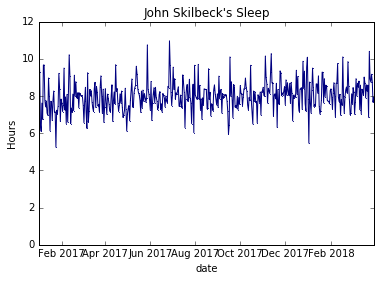

In [29]:
result = df.groupby(['date'])['Minutes Asleep'].sum()/60
title='John Skilbeck\'s Sleep'
result.plot(colormap='jet',
            kind='line',
            lw=1,
            marker='.',
            markersize=1,
            ylim=(0,12),
            xlim=('2017-01-01','2018-03-31'),
            title=title).set_ylabel('Hours')
# plt.savefig('/Users/skilbjo/Desktop/sleep.png',dpi=300)

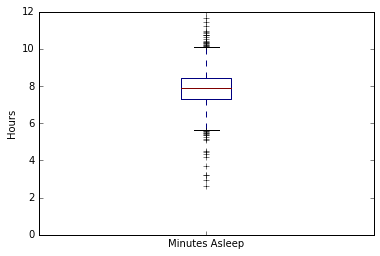

In [7]:
result.plot(colormap='jet',
            kind='box',
            ylim=(0,12)).set_ylabel('Hours')

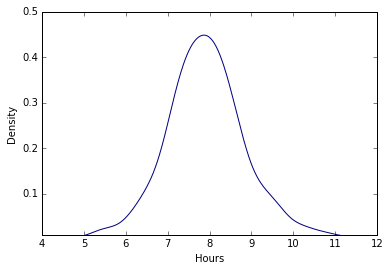

In [8]:
result.plot(colormap='jet',
            kind='kde',
            ylim=(0.01,0.5),
            xlim=(4,12)).set_xlabel('Hours')